Problem Statement
A Chinese automobile company Geely Auto aspires to enter the Nigerian market by setting up its manufacturing unit and producing cars locally to compete with their Nigerian, US and European counterparts.
They have contacted you, a Data Scientist to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Nigerian market, since those may be very different from the Chinese market. 
The company wants to know:
●	Which variables are significant in predicting the price of a car
●	How well do those variables describe the price of a car
Based on various market surveys, you have gathered a large data set of different types of cars across the Nigerian market.

BUSINESS GOAL(OBJECTIVE).
You are required to model the price of cars with the available independent variables. The management will use it to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


DATA DESCRIPTION:
●	car data.csv - To be used for training and tuning of models. 
●	Data Dictionary - carprices.xlsx 

Submission Guidelines
1.	The Submission should be made on your  GitHub repo. there are two parts to the submission: 
●	A well-commented Jupyter notebook 
●	A presentation as you would present to the top management/business leaders  [format - .pdf ] 
2.	Any found copied/ plagiarized by another person will not be graded and is an automatic disqualification
Best Practices for Notebook
●	The final notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
●	The notebook should be run from start to finish in a sequential manner before submission.
●	It is important to remove all warnings and errors before submission.
●	It is recommended that you read the problem statement and go through the criteria and description mentioned in the rubric before starting the project.
Criteria	Points
Exploratory Data Analysis and Insights
- Overview of the data - Univariate analysis
- Bivariate analysis
-Multivariate analysis	
Data pre-processing
- Prepare the data for analysis - Missing value Treatment - Ensure no data leakage	
Model building
- Build a  Regression model 	
Model Performances
- evaluate the model’s performance	
Business Insights & Conclusions
- Business insights and Conclusions.	
Notebook - Overall quality
- Structure and flow. - Well commented code.	
Presentation - Overall quality


In [1]:
#importing pandas Library
import pandas as pd

In [2]:
#Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
#loading /Reading the dataset
data_f=pd.read_csv('car data.csv')
data_f.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071.0,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796.0,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429.0,Diesel,Dealer,Manual,0
8,ciaz,2016,NaN,8.89,20273.0,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367.0,Diesel,Dealer,Manual,0


In [5]:
data_f.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988.0,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000.0,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934.0,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000.0,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464.0,Petrol,Dealer,Manual,0


# Explore the Dataset

In [6]:
data_f.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
#summary of the dataframe
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  297 non-null    float64
 3   Present_Price  298 non-null    float64
 4   Kms_Driven     300 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


# SANITY CHECK AND DATA WRANGling

In [8]:
data_f.isnull().sum()

Car_Name         0
Year             0
Selling_Price    4
Present_Price    3
Kms_Driven       1
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Replacing the missing values with a forward fill
data_f.ffill(inplace=True)

In [10]:
data_f.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Statistics For Numerical Columns Of The Dataframe


In [11]:
data_f.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.802857,7.628904,36951.598007,0.043189
std,2.891554,5.590379,8.643860,38887.494627,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.750000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,45.300000,92.600000,500000.000000,3.000000


# EDA

# UNIVARIATE ANALYSIS

<Axes: xlabel='Selling_Price', ylabel='Count'>

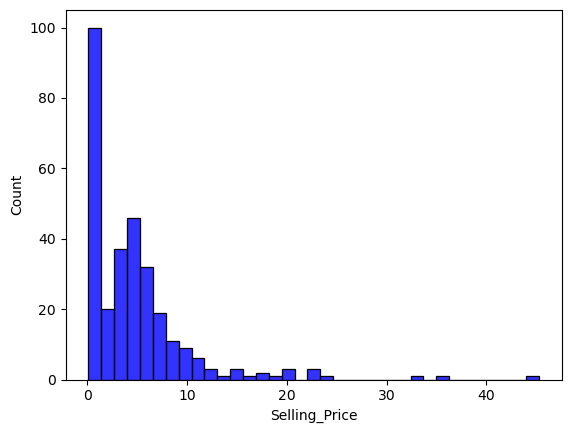

In [12]:

# Plot histograms of selling price againt frequency
sns.histplot(data=data_f, x='Selling_Price', bins=35, color='blue', alpha=0.8)
#plt.figure(figsize=(2,6))

Text(0.5, 1.0, 'Histogram of Present Price')

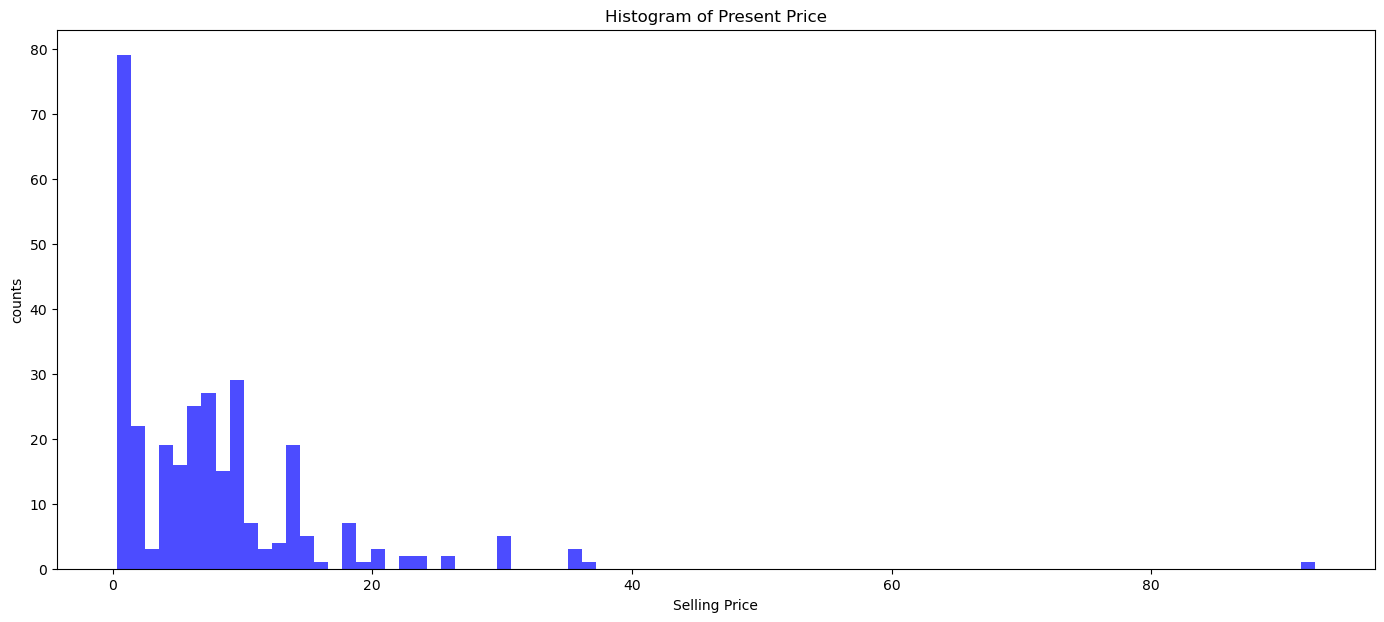

In [13]:

# Plot histograms of present price 
plt.figure(figsize=(17, 7))

plt.hist(data_f['Present_Price'], bins=85, color='blue', alpha=0.7)
plt.xlabel('Selling Price')
plt.ylabel('counts')
plt.title('Histogram of Present Price')

# BIVARIATE ANALYSIS

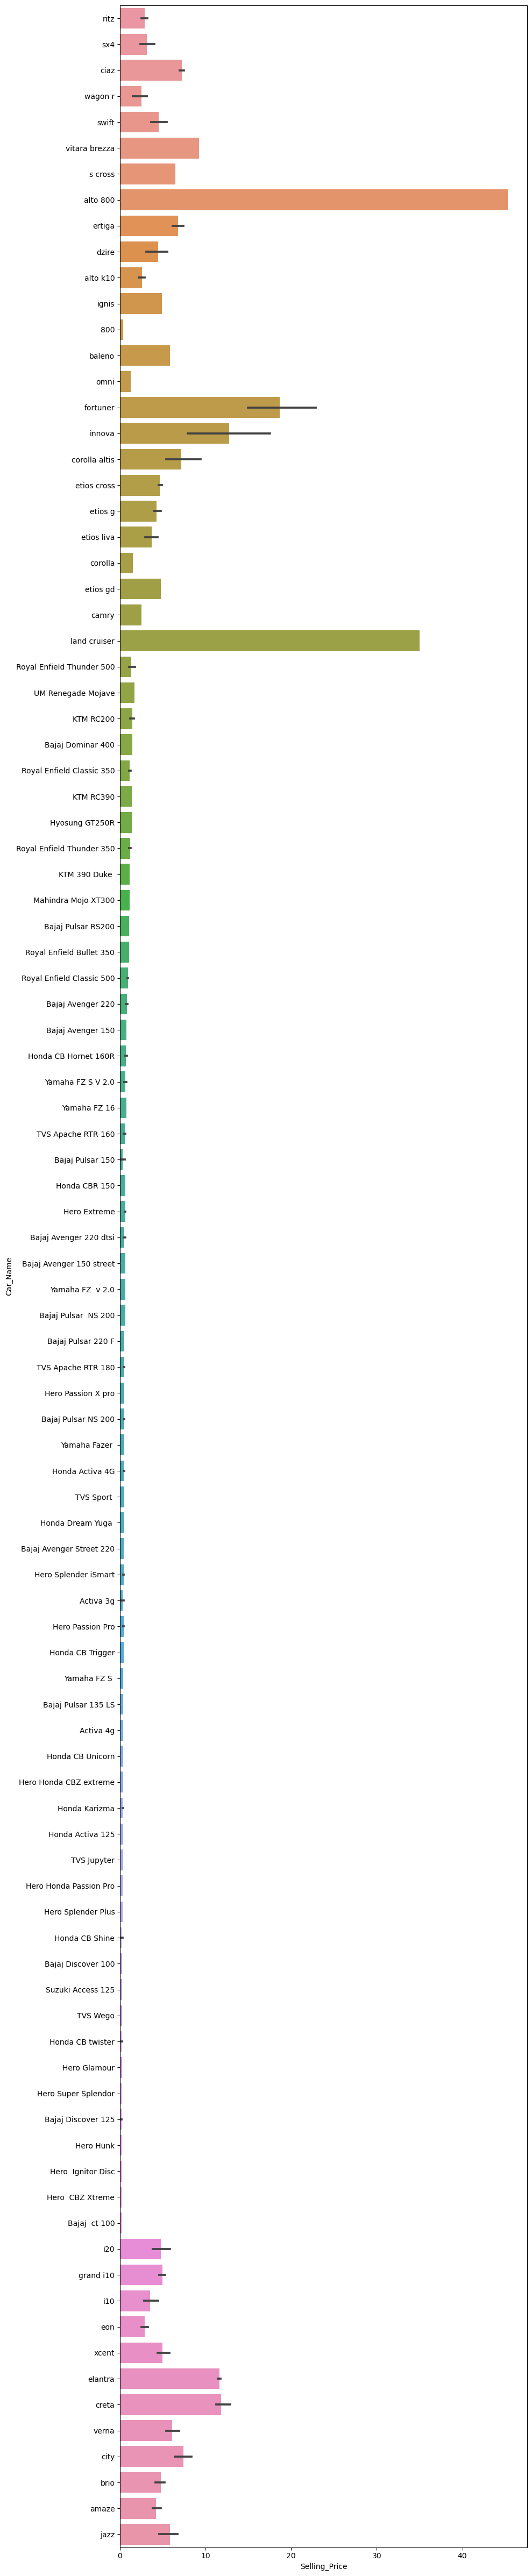

In [14]:
plt.figure(figsize=(10,48))
# Plot barplot of selling price and car names
sns.barplot(data=data_f, x='Selling_Price', y='Car_Name')

plt.tight_layout()

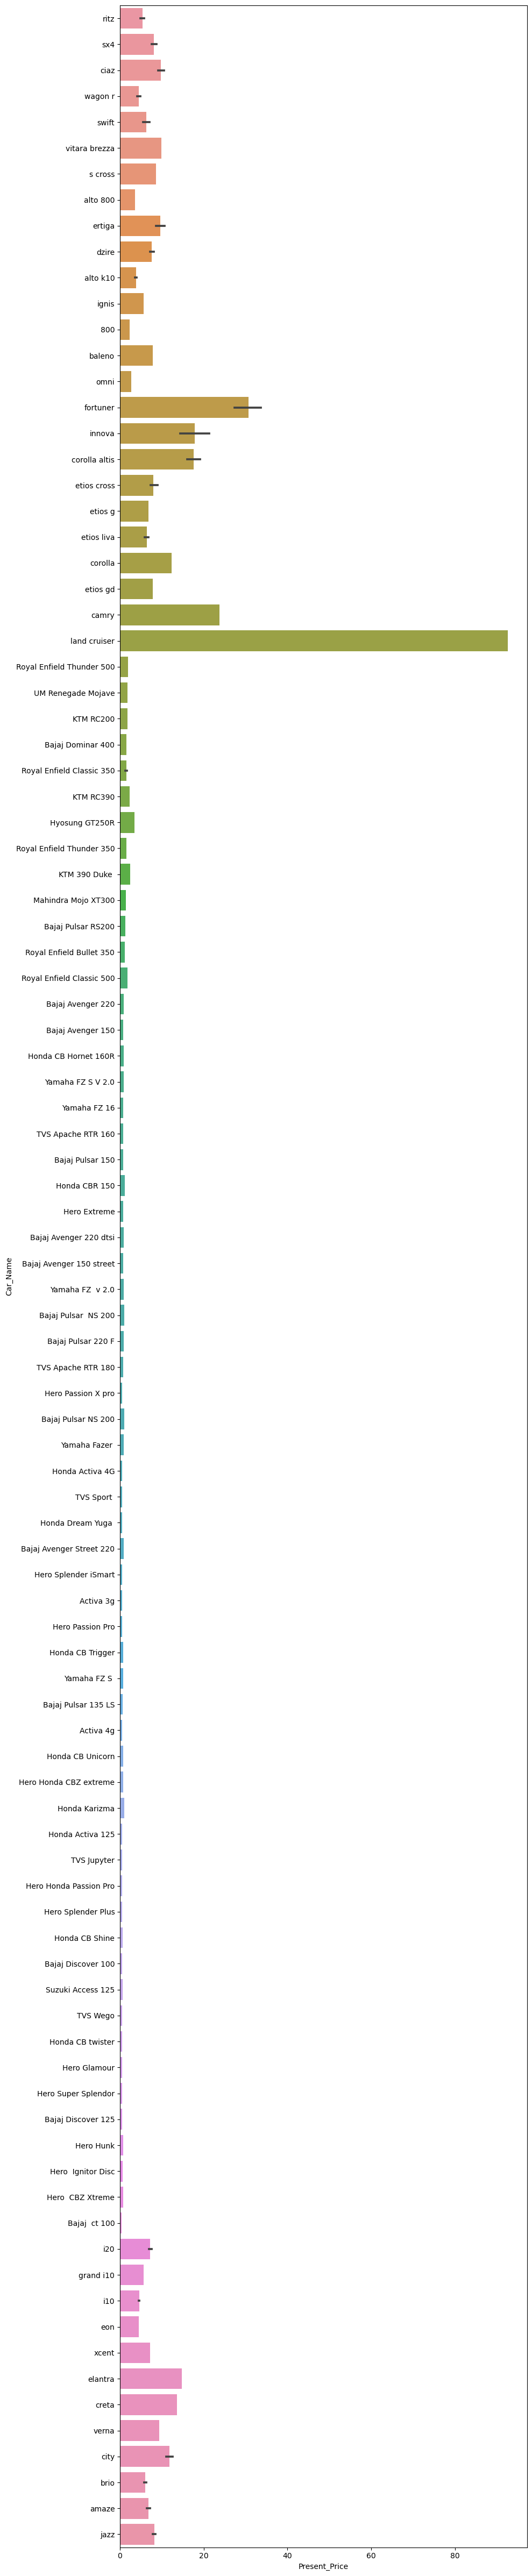

In [15]:
plt.figure(figsize=(10,48))
# Plot barplot of selling price and car names
sns.barplot(data=data_f, x='Present_Price', y='Car_Name')

plt.tight_layout()

Text(0.5, 1.0, 'Scatter Plot: Selling Price vs Kilometers Driven')

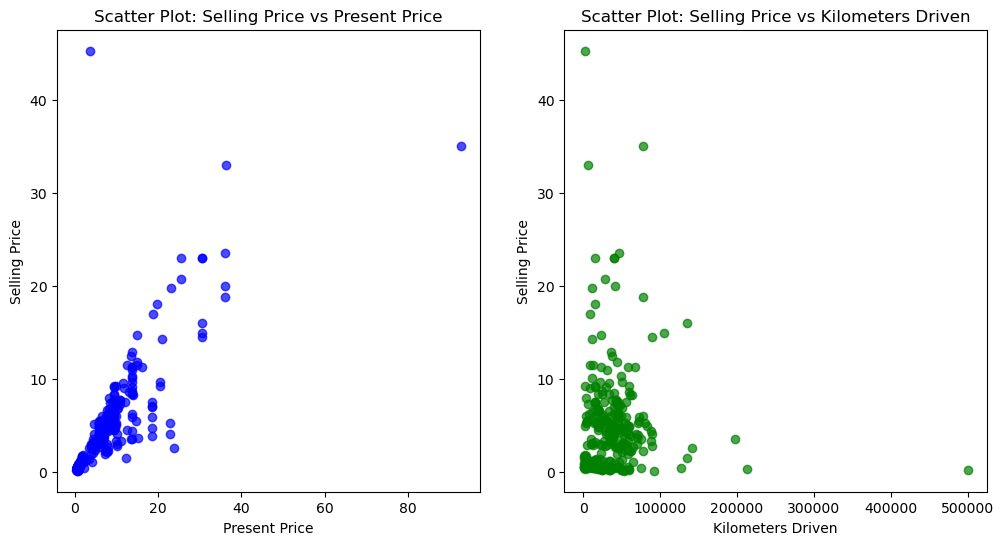

In [16]:
#Scatter Plot: Selling Price vs Present Price:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x = data_f['Present_Price'],y= data_f['Selling_Price'], color='blue', alpha=0.7)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Selling Price vs Present Price')

plt.subplot(1, 2, 2)
plt.scatter(x=data_f['Kms_Driven'], y=data_f['Selling_Price'], color='green', alpha=0.7)
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Selling Price vs Kilometers Driven')

C:\Users\blessing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


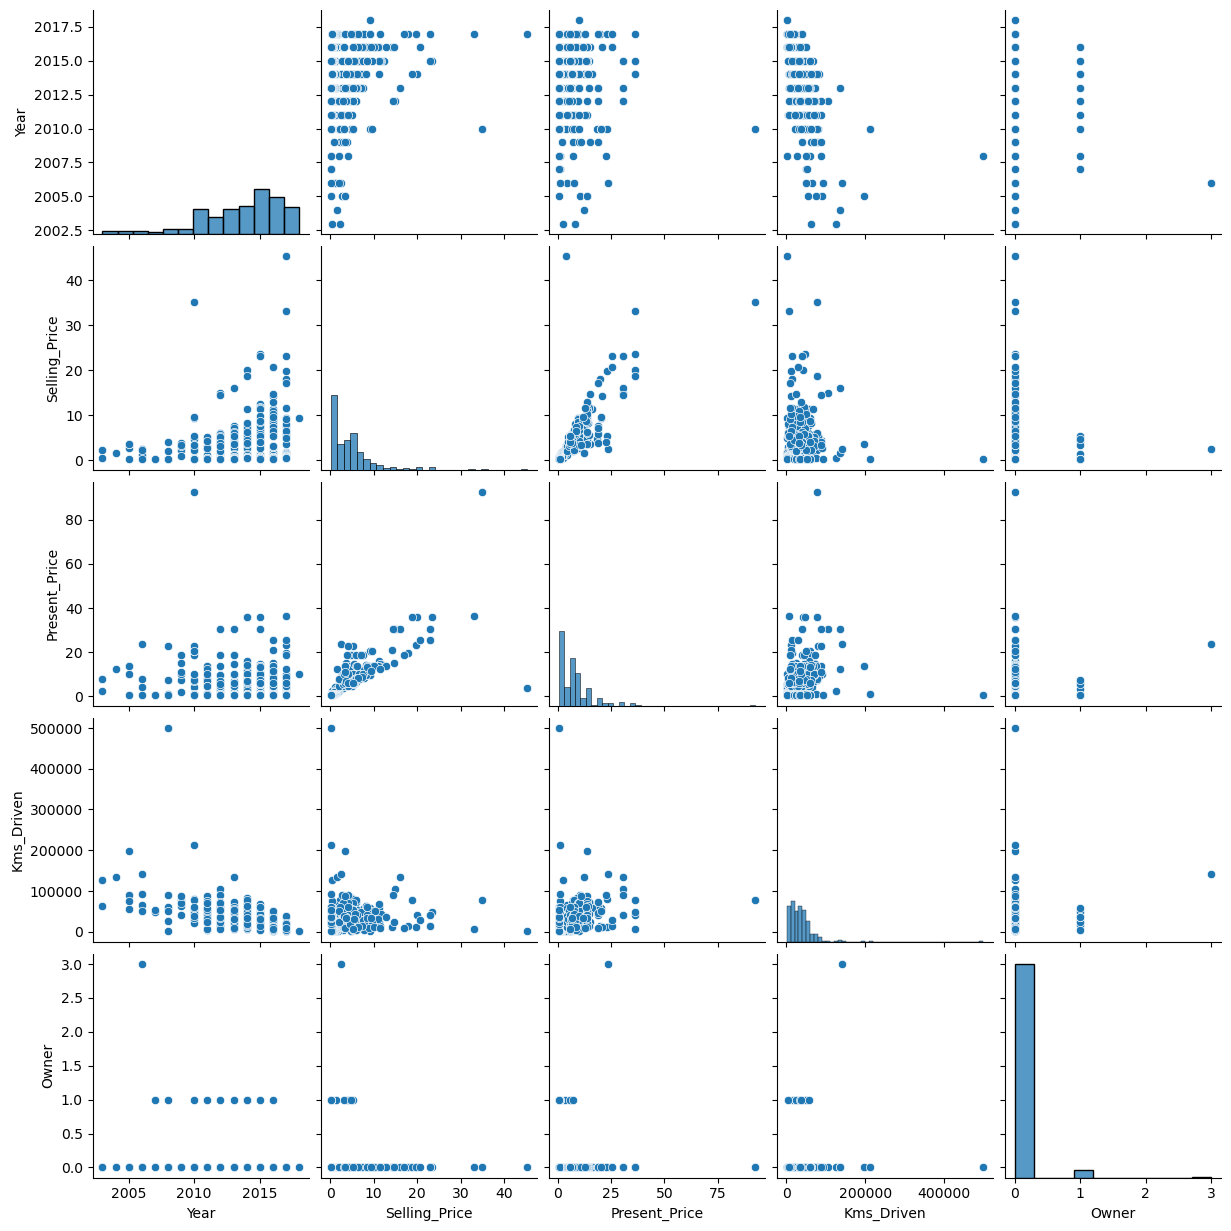

In [17]:
sns.pairplot(data_f)

# MODELLING using Linear Regression

In [18]:
from sklearn.model_selection import train_test_split #importing train test split to split the data into a testing and traing set
from sklearn.linear_model import LinearRegression #importing the linear regression algorithm
from sklearn import metrics # importing  metrics for evaluation

# Preparing Data for Modeling


In [19]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [20]:
# Example: Splitting data into features (X) and target (y)
x = data_f.drop(['Selling_Price','Car_Name'], axis=1)  
y = data_f['Selling_Price']  


In [21]:
#encoding the categorical variables
x1 = pd.get_dummies(x)
x1

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000.0,0,False,False,True,True,False,False,True
1,2013,9.54,43000.0,0,False,True,False,True,False,False,True
2,2017,9.85,6900.0,0,False,False,True,True,False,False,True
3,2011,4.15,5200.0,0,False,False,True,True,False,False,True
4,2014,6.87,42450.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988.0,0,False,True,False,True,False,False,True
297,2015,5.90,60000.0,0,False,False,True,True,False,False,True
298,2009,11.00,87934.0,0,False,False,True,True,False,False,True
299,2017,12.50,9000.0,0,False,True,False,True,False,False,True


In [22]:
#converting boolean datatype into integer
x2 = x1.astype(int)
x2

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5,27000,0,0,0,1,1,0,0,1
1,2013,9,43000,0,0,1,0,1,0,0,1
2,2017,9,6900,0,0,0,1,1,0,0,1
3,2011,4,5200,0,0,0,1,1,0,0,1
4,2014,6,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11,33988,0,0,1,0,1,0,0,1
297,2015,5,60000,0,0,0,1,1,0,0,1
298,2009,11,87934,0,0,0,1,1,0,0,1
299,2017,12,9000,0,0,1,0,1,0,0,1


In [23]:
X=x2.drop(['Fuel_Type_CNG','Seller_Type_Individual','Transmission_Manual'],axis=1)
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Automatic
0,2014,5,27000,0,0,1,1,0
1,2013,9,43000,0,1,0,1,0
2,2017,9,6900,0,0,1,1,0
3,2011,4,5200,0,0,1,1,0
4,2014,6,42450,0,1,0,1,0


# Building and Evaluating the Linear Regression Model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [26]:
#importing the standarscaler
from sklearn.preprocessing import StandardScaler

In [27]:
# Initializing the scaler
scaler=StandardScaler()
scaler

StandardScaler()

In [28]:
#fitting the model into the scaler
scaler.fit_transform(x_train)

array([[ 8.36583228e-01, -5.25620572e-02, -2.54508306e-01, ...,
         5.00000000e-01,  7.07106781e-01, -4.00276148e-01],
       [ 1.68589016e-01, -1.61849503e-01,  2.55774842e-02, ...,
         5.00000000e-01,  7.07106781e-01, -4.00276148e-01],
       [ 8.36583228e-01, -5.25620572e-02, -3.53620109e-01, ...,
         5.00000000e-01,  7.07106781e-01,  2.49827527e+00],
       ...,
       [-4.99405197e-01,  1.14959984e+00,  8.09651081e-01, ...,
         5.00000000e-01,  7.07106781e-01, -4.00276148e-01],
       [ 1.68589016e-01, -5.25620572e-02,  1.07518426e-03, ...,
        -2.00000000e+00,  7.07106781e-01, -4.00276148e-01],
       [ 5.02586122e-01, -8.17574177e-01, -5.13473114e-01, ...,
         5.00000000e-01, -1.41421356e+00, -4.00276148e-01]])

In [29]:
# Initializing the model
model = LinearRegression()


In [30]:
# fitting the model
model.fit(x_train, y_train)


LinearRegression()

In [31]:
# Make predictions
y_predictions = model.predict(x_test)
y_predictions


array([16.86949916,  2.15035098,  2.06271468, -0.28483155,  4.9537726 ,
        7.190337  , 10.31580778,  2.56772982,  1.70841024,  5.93491412,
        2.09192678,  7.4914036 ,  3.81366685,  4.28430855,  4.60319044,
        3.89855059, -1.90348459,  3.78294492,  8.96151655,  4.10853508,
        2.13242631,  1.56566836,  5.06030913,  2.25537662,  3.49986102,
        9.36088309, 10.14235728,  9.98938386,  0.40183393,  8.76692529,
       -1.09614805,  4.26605098,  1.16289557,  4.06661897,  7.85702391,
        3.71854927,  1.6055021 ,  5.09532592,  1.28193487,  1.87707993,
        4.36801886, 20.5617279 ,  0.80062231,  0.81011624,  0.35801578,
        6.78424559,  7.61716395,  4.29518579,  6.85574812,  2.56699952,
        2.11270815, -1.97916831,  3.30780767, 11.10411318,  1.74425957,
       -0.14633357,  1.62774407,  0.37262183, -2.7862409 ,  7.90916186,
        2.14729186,  7.78763194,  2.4527841 ,  4.28729427,  2.66346847,
        9.14179234,  2.12891014,  4.08633714, 16.86706116,  6.08

In [32]:
# Evaluating the model
mse =metrics.mean_squared_error(y_test, y_predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 20.771580523310963


In [33]:
#view the intercept
print(model.intercept_)

-846.9464259606297


In [34]:
#view the coefficient
print(model.coef_)

[ 4.20697458e-01  4.24681865e-01 -7.30302490e-06 -9.82345195e-01
  2.41203305e+00  5.71913988e-01  9.46549584e-01  1.92357101e+00]


# MODEL ACCURACY

In [35]:
#checking the score
model.score(x_test,y_test)

0.4802884988764955

In [36]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Automatic
0,2014,5,27000,0,0,1,1,0
1,2013,9,43000,0,1,0,1,0
2,2017,9,6900,0,0,1,1,0
3,2011,4,5200,0,0,1,1,0
4,2014,6,42450,0,1,0,1,0


# RECOMMENDATIONS

1.Adjust pricing strategy based on market trends identified.
2.Enhance marketing efforts for cars with higher present price and lower mileage.
3.Collaborate with dealers to optimize inventory mix based on fuel type demand.